# **Hypothesis testing**

## **Task 1**
### **Light vs. Dark Theme User Behavior Dataset**

In [111]:
import pandas as pd
import numpy as np
import pingouin
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('website_ab_test.csv')
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


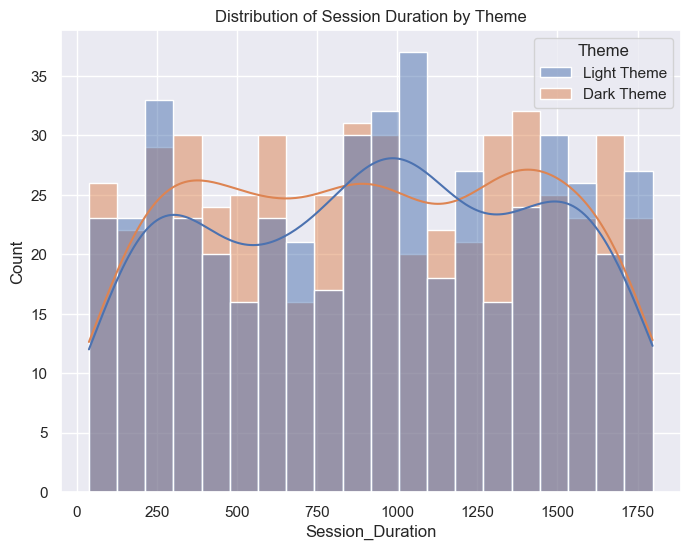

In [112]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Session_Duration', hue='Theme', kde=True, bins=20)
plt.title("Distribution of Session Duration by Theme")
plt.ylabel("Count")
plt.show()

In [113]:
# Summary of the dataset
Data_summary= {
    'Number of rows': df.shape[0],
    'Number of columns': df.shape[1],
    'Missing values summary': df.isnull().sum(),
    'Summary of numerical columns': df.describe(),
    'Data types of each column': df.dtypes
}
print(Data_summary)

{'Number of rows': 1000, 'Number of columns': 10, 'Missing values summary': Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64, 'Summary of numerical columns':        Click Through Rate  Conversion Rate  Bounce Rate  Scroll_Depth  \
count         1000.000000      1000.000000  1000.000000   1000.000000   
mean             0.256048         0.253312     0.505758     50.319494   
std              0.139265         0.139092     0.172195     16.895269   
min              0.010767         0.010881     0.200720     20.011738   
25%              0.140794         0.131564     0.353609     35.655167   
50%              0.253715         0.252823     0.514049     51.130712   
75%              0.370674         0.373040     0.648557     64.666258   
max              0.499989         0.498916     0.79965

**From the above we can summarise our data thus:**

- **Click through** rate ranges between 0.01 and 0.50, and has a mean of approximately  0.26

- **Conversion Rate** also ranges between 0.01 and 0.50 and has a mean of approximately  0.25.

- **Bounce Rate** shows a spread between 0.20 and  0.80 and a mean of about 0.51.

- **Scroll_Depth** varies between 20.01, 80.00 with a mean value of 50.32.

- **Age ranges** between 18 years and 65 years with an average age of 41.52.

- **Session_Duration** has a wide range of 38 seconds to almost 1800 seconds(about 30 minutes), with a mean session duration of 925 seconds(about 15 minutes).


In [114]:
df_numerical=df[['Theme','Click Through Rate', 'Conversion Rate', 'Bounce Rate', 'Scroll_Depth','Age', 'Session_Duration']] 

Theme_performance=df_numerical.groupby('Theme').mean()

Theme_performance_sorted= Theme_performance.sort_values(by='Conversion Rate',ascending=False) 
print(Theme_performance_sorted)

             Click Through Rate  Conversion Rate  Bounce Rate  Scroll_Depth  \
Theme                                                                         
Light Theme            0.247109         0.255459     0.499035     50.735232   
Dark Theme             0.264501         0.251282     0.512115     49.926404   

                   Age  Session_Duration  
Theme                                     
Light Theme  41.734568        930.833333  
Dark Theme   41.332685        919.482490  


**From the comparison of both themes, we can observe the following:**

- **Click Through Rate:** The Dark Theme hasly high averageer click-through rate (0.26) than the Light Theme-(0.25) 
- **Conversion Rate** The Light Theme has a higher average conversion rate(0.26) than the Dark Theme(0.25).
- **Bounce Rate:** The Dark Theme shows a slightly higher bounce (0.51) rate compared to the Light Theme (0.50).
- **Scroll Depth:** The Light Theme has a slightly greater scroll (51%) depth than the Dark Theme (50%) .
- **Age:** The average age of users for both the Light(41.73 years) Theme and the Dark(41.33) Theme is nearly the same.
- **Session Duration:** The Light Theme has a longer session (930.84 seconds) duration in comparison to the Dark (919.48 seconds) Theme. 


- **Null hypothesis:** There is no difference in Conversion Rate between the Light team and Dark theme.
  
    **H0:** conversion rate<sub>light</sub> - conversion rate<sub>dark</sub>=0
-  **Alternative hypothesis:** There is a difference in Conversion Rate between the Light team and Dark theme.

     **H1:** conversion rate<sub>light</sub> - conversion rate<sub>dark</sub>!=0


In [115]:
a=0.05

In [116]:
Conversion_rate_light= df[df['Theme']=='Light Theme']['Conversion Rate']   
Conversion_rate_dark= df[df['Theme']=='Dark Theme']['Conversion Rate']

In [117]:
t_stats_cr, p_value_cr=pingouin.ttest(x=Conversion_rate_light ,y=Conversion_rate_dark,alternative='two-sided')[['T', 'p-val']].values[0]

print("P-value: ", p_value_cr)

P-value:  0.6349982678451778


The p-val is 0.634998 which is greater than our significance level of 0.05, therefore we fail to reject the null hypothesis.

This means there isn't enough evidence to support that there is a difference between the conversion rate<sub>light</sub> and conversion rate<sub>dark</sub> we therefore assume that there is no difference between the themes.

In [118]:
Click_Through_Rate_light= df[df['Theme']=='Light Theme']['Click Through Rate']
Click_Through_Rate_dark= df[df['Theme']=='Dark Theme']['Click Through Rate']

t_stats_ctr, p_value_ctr = pingouin.ttest(x=Click_Through_Rate_light, y=Click_Through_Rate_dark,alternative='two-sided')[['T', 'p-val']].values[0]

In [119]:
Bounce_Rate_light= df[df['Theme']=='Light Theme']['Bounce Rate']
Bounce_Rate_dark= df[df['Theme']=='Dark Theme']['Bounce Rate']

t_stats_br, p_value_br = pingouin.ttest(x=Bounce_Rate_light, y=Bounce_Rate_dark,alternative='two-sided')[['T', 'p-val']].values[0]


In [120]:
Scroll_Depth_light= df[df['Theme']=='Light Theme']['Scroll_Depth']
Scroll_Depth_dark= df[df['Theme']=='Dark Theme']['Scroll_Depth']


t_stats_Scd, p_value_Scd = pingouin.ttest(x=Scroll_Depth_light, y=Scroll_Depth_dark,alternative='two-sided')[['T', 'p-val']].values[0]

In [121]:
Session_Duration_light= df[df['Theme']=='Light Theme']['Session_Duration']
Session_Duration_dark= df[df['Theme']=='Dark Theme']['Session_Duration']

t_stats_sd, p_value_sd= pingouin.ttest(x=Session_Duration_light ,y=Session_Duration_dark)[['T', 'p-val']].values[0]


In [122]:
Table_for_Comparison = pd.DataFrame({
     'Metric':['Click Through Rate','Conversion Rate','Bounce Rate','Scroll_Depth','Session_Duration'] ,
     'T_stats': [t_stats_ctr,t_stats_cr,t_stats_br,t_stats_Scd, t_stats_sd],
     'P_value':[ p_value_ctr,p_value_cr, p_value_br, p_value_Scd, p_value_sd]
 })
Table_for_Comparison.head()

,Metric,T_stats,P_value
0,Click Through Rate,-1.978171,0.048184
1,Conversion Rate,0.474849,0.634998
2,Bounce Rate,-1.201888,0.229692
3,Scroll_Depth,0.756228,0.449692
4,Session_Duration,0.352912,0.724229


Recall that our significance level is 0.05, and if p-value is higher than this we fail to reject the null hypothesis which state that there is no difference between the light theme and the dark theme

- **Click Through Rate:** There is a significant difference between the light and dark theme.(P-value=0.048)
- **Conversion Rate:** There is no statistically significant difference between the light and dark theme.(P-value=0.635)
- **Bounce Rate:** There is no statistically significant difference between the light and dark theme.(P-value=0.230)
- **Scroll_Depth:** The difference between the light and dark theme is not statistically significant.(P-value=0.450) 
- **Session_Duration:** There is no statistically significant difference observed between the light and dark theme.(P-value=0.724)

## **Task 2**
### **Medical Cost Personal Dataset**

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('insurance.csv')
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [124]:
df.shape

(1338, 7)

In [125]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


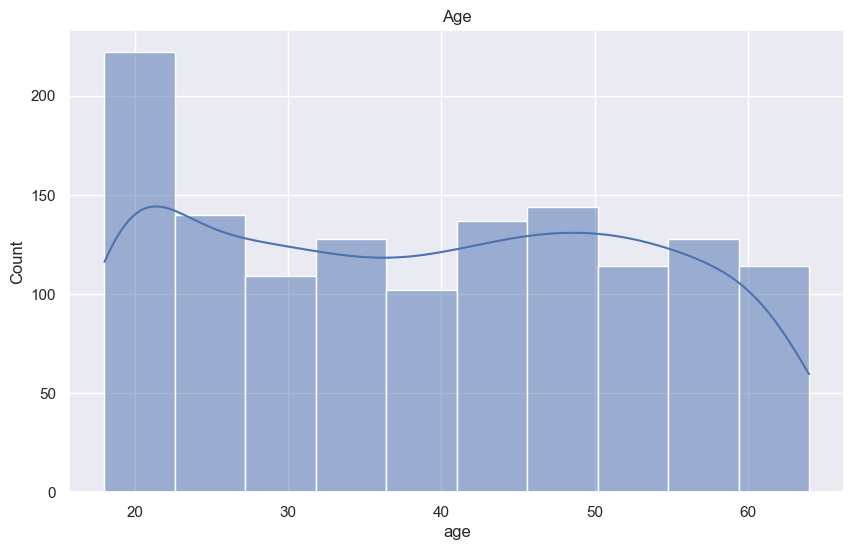

In [126]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],kde=True,bins=10)
plt.title('Age')
plt.show()

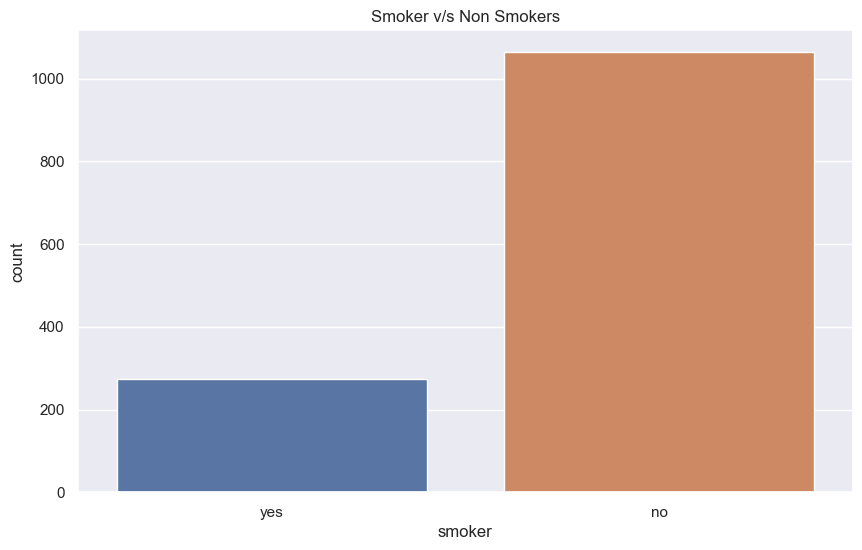

In [127]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='smoker', hue="smoker")
plt.title('Smoker v/s Non Smokers')
plt.show()

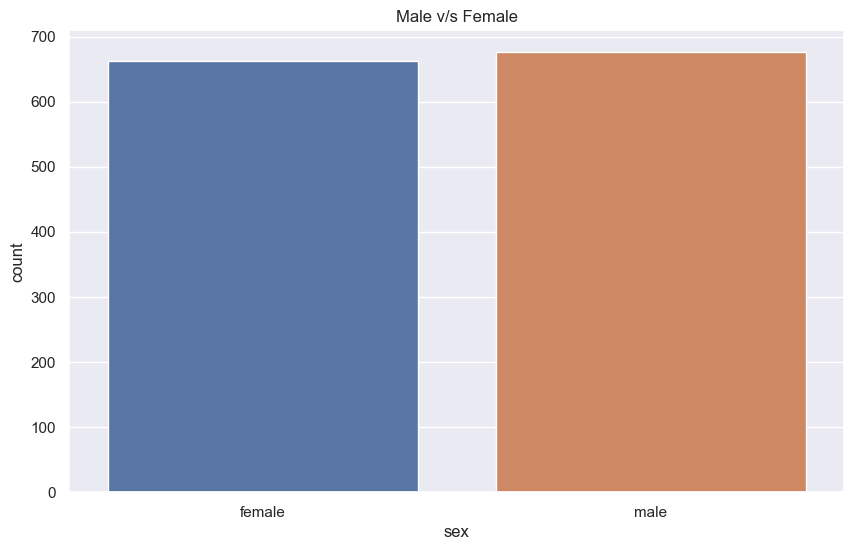

In [128]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='sex', hue="sex")
plt.title('Male v/s Female')
plt.show()

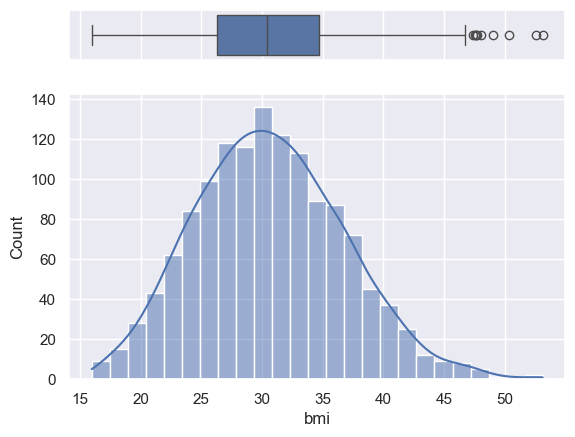

In [129]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='bmi', ax=ax_box)
sns.histplot(data=df, x="bmi", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

<h2>Threating Outliers </h2>

In [130]:
Q3 = df['bmi'].quantile(0.75)
Q1 = df['bmi'].quantile(0.25)
IQR = Q3-Q1

upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)

data = df[(df['bmi']>lower) & (df['bmi']<upper)]

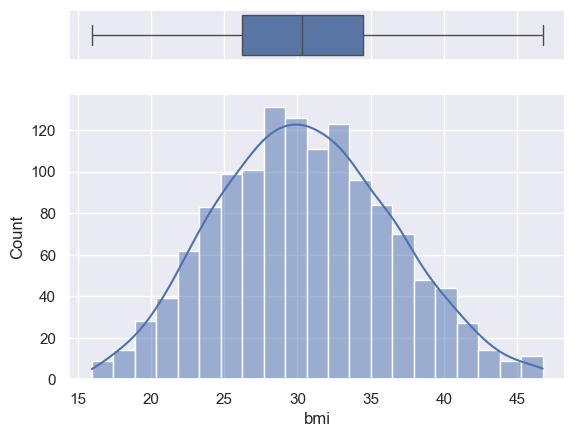

In [131]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='bmi', ax=ax_box)
sns.histplot(data=data, x="bmi", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

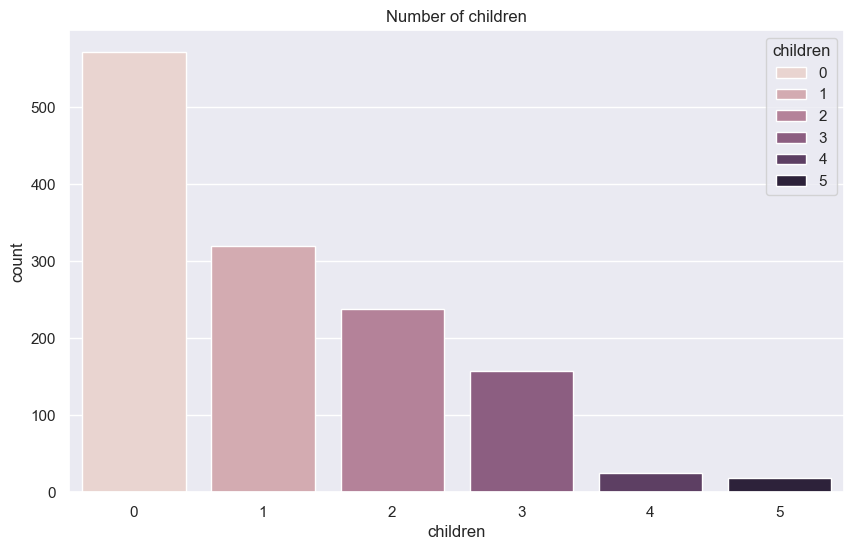

In [132]:
plt.figure(figsize=(10,6))
sns.countplot(data = data,x='children', hue="children")
plt.title('Number of children')
plt.show()

From the above graphs, we can say 
- Number of children 0,1,2,3 are more common
- Number of children 4 and 5 are almost equal and rare.

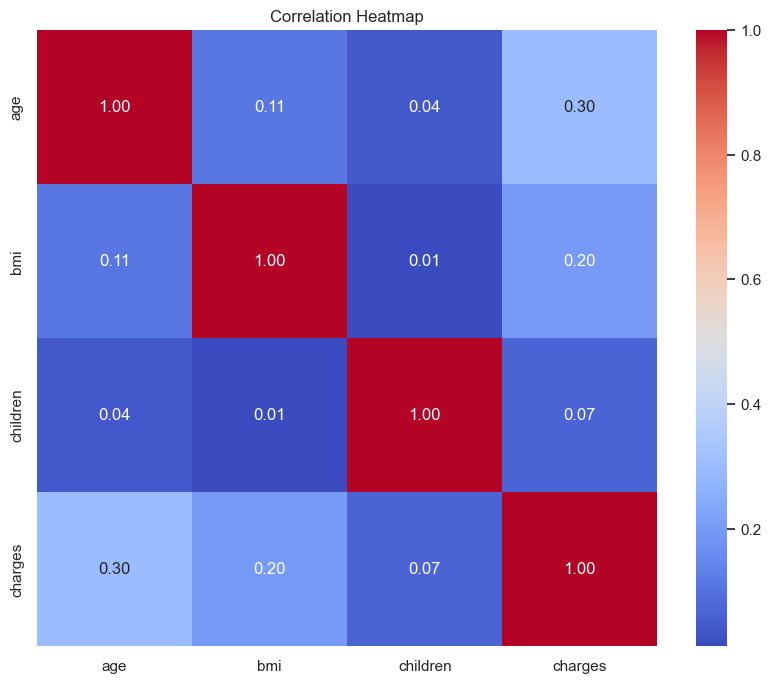

In [133]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

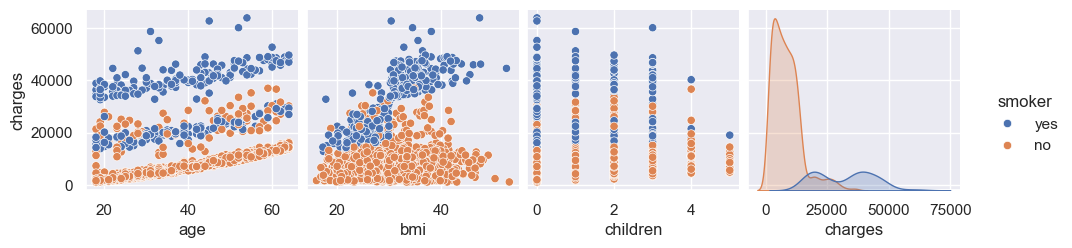

In [134]:
sns.pairplot(df,hue='smoker',y_vars=['charges'])
plt.show()

## **Task 3**
### **Airline Passenger Satisfaction Survey Dataset**

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import pingouin as pg

df = pd.read_csv("train.csv")

df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [136]:
df.drop(['Unnamed: 0', 'id', ], axis=1, inplace=True) 

In [137]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [138]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

<Axes: >

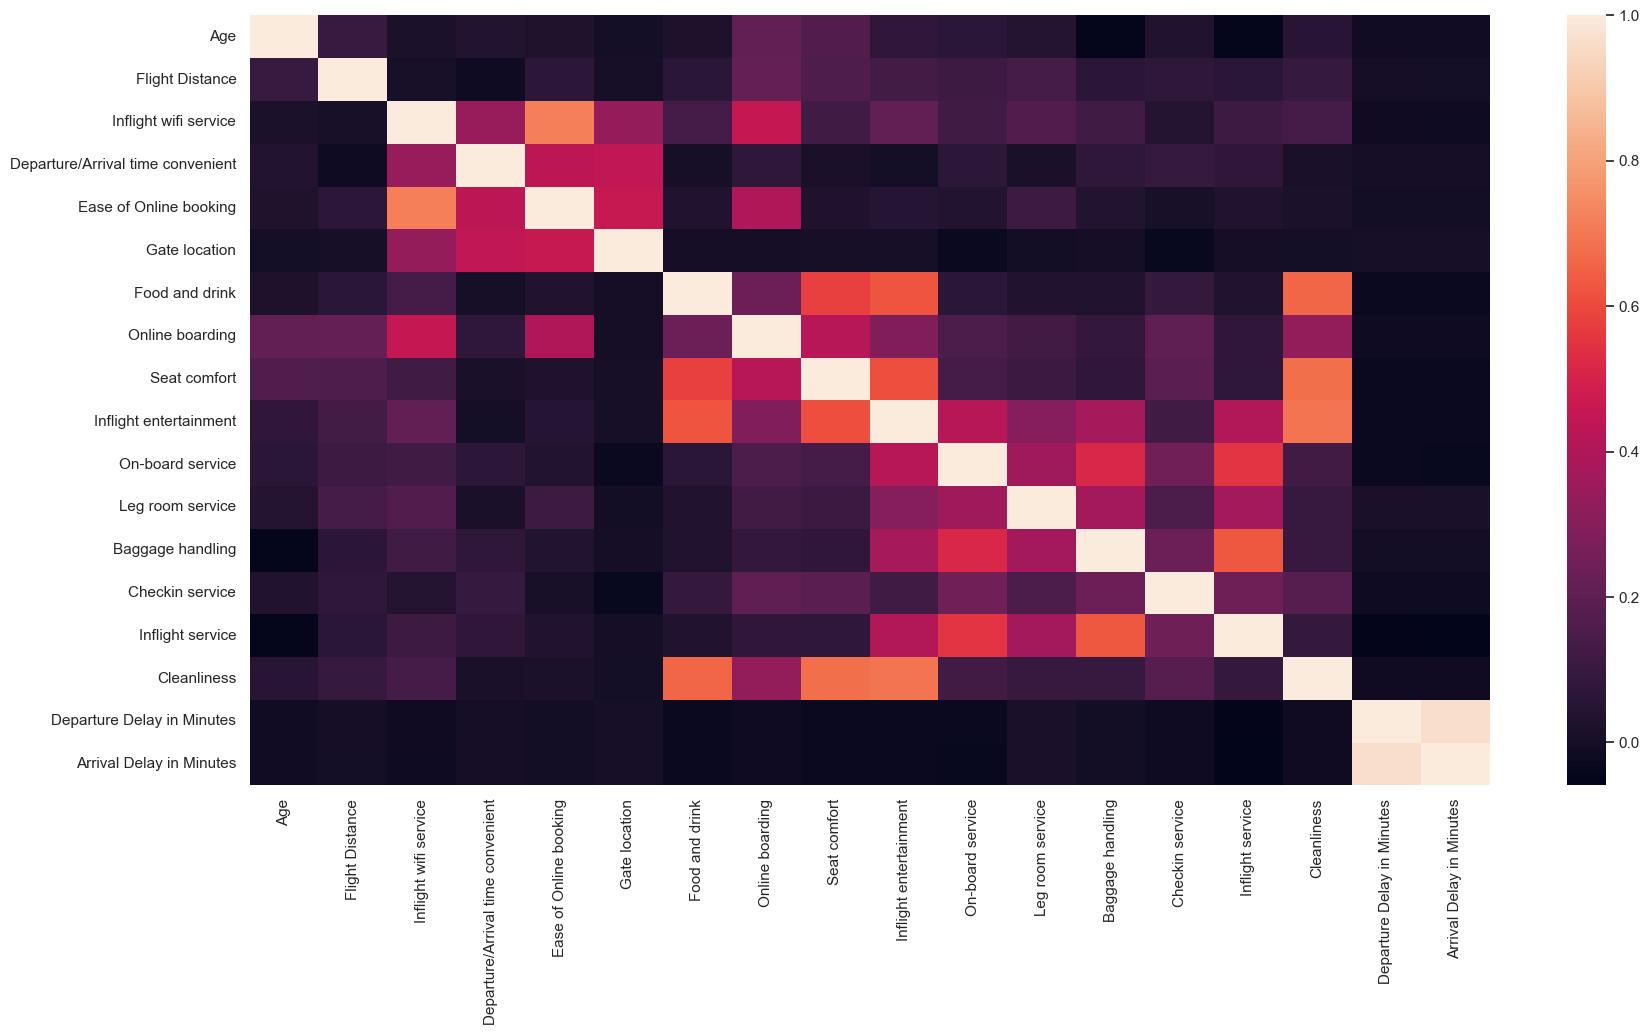

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(include="number").corr())

Some variables are quite highly correlated. However, what really stands out is the extremely high correlation (0.98) between the "Departure Delay in Minutes" and the "Arrival Delay in Minutes". Considering this high correlation and the fact that we had 310 Nan in the "Arrival Delay in Minutes" column, we'll gonna remove it

In [140]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [141]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, satisfaction]
Index: []

[0 rows x 22 columns]


c:\Users\voins\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


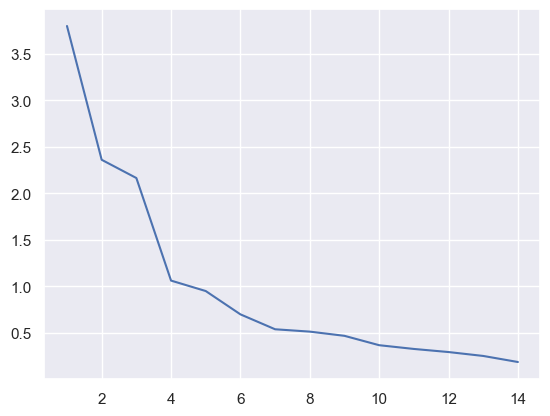

In [142]:
x =df[df.columns[6:20]] 

fa = FactorAnalyzer()
fa.fit(x, 10)

ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)


In [143]:
fa = FactorAnalyzer(4, rotation='varimax')
fa.fit(x)
loadings = pd.DataFrame(fa.loadings_, index=x.columns)
print(loadings)

c:\Users\voins\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                                          0         1         2         3
Inflight wifi service              0.092606  0.132303  0.605630  0.478035
Departure/Arrival time convenient -0.006287  0.057166  0.589643  0.000283
Ease of Online booking            -0.036124  0.027503  0.766509  0.463396
Gate location                      0.013097 -0.045142  0.680813 -0.100044
Food and drink                     0.770130  0.002845  0.032987  0.040034
Online boarding                    0.286895  0.118512  0.094301  0.756382
Seat comfort                       0.754094  0.078646 -0.028100  0.213668
Inflight entertainment             0.766237  0.464666  0.041222  0.032708
On-board service                   0.087931  0.700438  0.010385  0.051850
Leg room service                   0.057541  0.483208  0.040559  0.097485
Baggage handling                   0.036738  0.763384  0.047617 -0.030583
Checkin service                    0.116816  0.285782 -0.025507  0.131914
Inflight service                   0.0

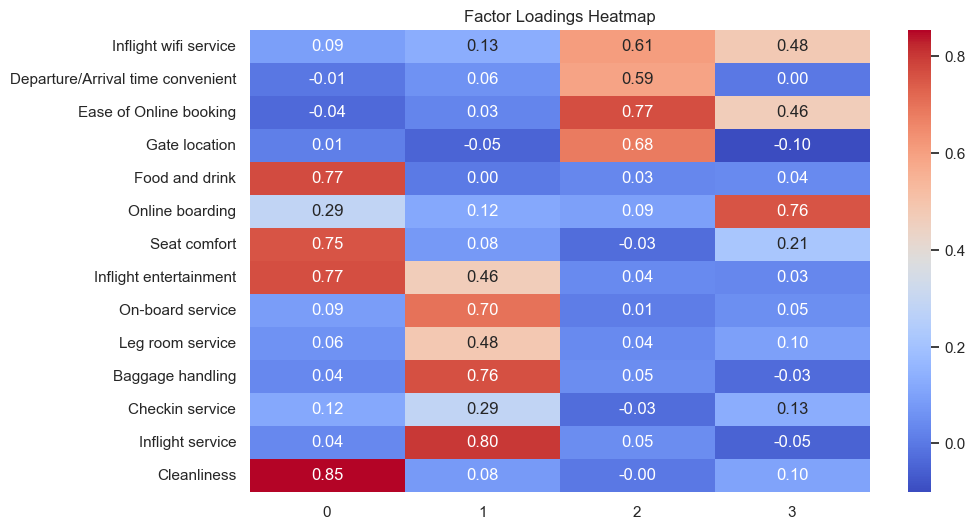

In [144]:
plt.figure(figsize=(10,6))
sns.heatmap(loadings, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Factor Loadings Heatmap')
plt.show()

Here are the 3 factors, the variables they contain and their possible "interpretability":

- Comfort: Food and Drink, Seat comfort, Inflight entertainment, Cleanliness
- Service: Onboard service, Baggage Handling, Inflight Service
- Convenience: In flight Wifi, Departure/Arrival time convenience, Online Booking, Gate Location.

In [145]:
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]

factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)

print(factor1_alpha, factor2_alpha, factor3_alpha)

(np.float64(0.87628779166241), array([0.875, 0.878])) (np.float64(0.7942916933090223), array([0.792, 0.796])) (np.float64(0.7679754211110685), array([0.766, 0.77 ]))


Factor 1: <br>
- Food and drink loads highly (0.77)
- Seat comfort loads highly (0.75)
- Inflight entertainment loads highly (0.77)
- Cleanliness loads very highly (0.85)

Conclusion for Factor 1:

- This factor is related to the comfort and quality of in-flight services.
- It could be interpreted as "In-flight Service Quality".

Factor 2: <br>
- On-board service loads highly (0.70)
- Baggage handling loads very highly (0.76)
- Inflight service loads very highly (0.80)
- Leg room service moderately loads (0.48)

Conclusion for Factor 2:

- This factor focuses on services related to pre-flight and passenger assistance.
- It may be defined as "Ground Service and Passenger Assistance".

Factor 3: <br>
- Ease of Online booking loads very highly (0.77)
- Gate location loads highly (0.68)
- Departure/Arrival time convenient loads moderately (0.59)
- Inflight wifi service moderately loads (0.61)

Conclusion for Factor 3:

- This factor is focused on travel convenience, including booking, departure/arrival times, and gate location.
- It could be defined as "Travel Convenience and Organization".

Factor 4: <br>
- Online boarding loads very highly (0.76)
- Ease of Online booking moderately loads (0.46)

Conclusion for Factor 4:

- This factor is related to digital services provided by the airline, such as online check-in and booking.
- It may be defined as "Digital Services and Self-service".